In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn import metrics
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LinearRegression
import seaborn as sns
import re
from sklearn.metrics import mean_absolute_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Ridge
from sklearn.metrics import confusion_matrix
from sklearn import linear_model
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import scale
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from xgboost import XGBRegressor
#dataset of features t-3
new_features_3 = pd.read_csv(r'D:\user\OneDrive\Desktop\data_mining\precipitation_new_features.csv').dropna()
target_3=new_features_3['mean_totalPrecipitation']

features_3=new_features_3.drop(['mean_totalPrecipitation','mean_Friction_velocity-1','mean_Total_column_supercooled_liquid_water-2',
                   'mean_Convective_available_potential_energy','mean_Convective_available_potential_energy-1',
                   'mean_largeScaleRainRate-2','mean_two_m_dewpoint_temperature','mean_two_m_dewpoint_temperature-1',
                   'mean_two_m_dewpoint_temperature-2','mean_two_m_dewpoint_temperature-3',
                   'var_hundred_metre_U_wind_component-1','var_hundred_metre_U_wind_component-2',
                   'mean_Total_column_supercooled_liquid_water','var_evaporation-3','var_evaporation',
                    'var_runOff','var_runOff-1','var_runOff-2','var_runOff-3','var_evaporation-1','var_evaporation-2',
                   'mean_Convective_inhibition','mean_Convective_inhibition-2','mean_instanteneousLargeScaleSurfacePrecipitation ',
                   'mean_Total_column_cloud_liquid_water','mean_Total_column_cloud_liquid_water-3','mean_Total_column_cloud_liquid_water-1'],axis=1)

#dataset of new features
new_features = pd.read_csv(r'D:\user\OneDrive\Desktop\data_mining\final_df.csv').dropna()
new_features=new_features.drop(['Unnamed: 0','Unnamed: 0.1'],axis=1)
new_features_target=new_features['mean_totalPrecipitation'].values.reshape(-1,1)
new_features_features=new_features.drop([ 'mean_Geopotential',
       'var_Geopotential', 'mean_K_index', 'var_K_index','Var_tot_tot_indx', 'avg_tot_tot_indx','mean_totalPrecipitation',
        'var_totalPrecipitation','avg_perc_type','mean_hundred_metre_U_wind_component',
        'mean_neutral_wind_at_10_m_u_component','var_Total_column_cloud_liquid_water','mean_Cloud_base_height'
        ,'var_Cloud_base_height','mean_cloud_area_fraction','var_cloud_area_fraction','var_U_component_stokes_drift'
        ,'var_V_component_stokes_drift','mean_Zero_degree_level','var_Convective_available_potential_energy',
        'var_Total_column_supercooled_liquid_water','var_precipitationType','var_total_column_cloud_ice_water'
        ,'var_neutral_wind_at_10_m_u_component','var_surface_air_pressure',
        'mean_surface_air_pressure','var_Instantaneous_surface_sensible_heat_flux','var_total_column_cloud_ice_water'
                ,'var_Convective_inhibition','var_Friction_velocity','Var_perc_type'
                   ,'mean_Instantaneous_surface_sensible_heat_flux','var_two_m_dewpoint_temperature','var_Zero_degree_level'
                   ,'var_Zero_degree_level','var_Standard_deviation_of_filtered_subgrid_orography',
                   'mean_evaporation','mean_runOff','var_instanteneousLargeScaleSurfacePrecipitation'
                   ,'var_Total_column_water_vapour','var_Total_column_water','var_surface_upward_sensible_heat_flux',
                   'avg_surface_temperature','mean_surface_upward_sensible_heat_flux','mean_total_column_cloud_ice_water'
                   ,'mean_neutral_wind_at_10_m_v_component','var_skin_temperature','Var_surface_temperature',
                       'mean_Total_column_water_vapour','mean_Total_column_water','mean_U_component_stokes_drift',
                       'mean_V_component_stokes_drift','mean_Standard_deviation_of_filtered_subgrid_orography',
                       'var_largeScaleRainRate','mean_skin_temperature','var_neutral_wind_at_10_m_v_component'
                   ,'mean_Convective_inhibition','mean_Convective_available_potential_energy','mean_precipitationType'],axis=1)



#dataset choosing features using correlation
correlation_data=pd.read_csv(r'D:\user\OneDrive\Desktop\data_mining\final_attributes_precipitation.csv').dropna()
correlation_data=correlation_data.drop('Unnamed: 0',axis=1)
features_corr=correlation_data.drop(['mean_totalPrecipitation','tot_precipitation'],axis=1)
target_corr=correlation_data['mean_totalPrecipitation']


#aggregated values 
agg_train=pd.read_csv(r'D:\user\OneDrive\Desktop\data_mining\full_and_aggregated_train_regression.csv').drop('Unnamed: 0',axis=1)
agg_test=pd.read_csv(r'D:\user\OneDrive\Desktop\data_mining\full_and_aggregated_test_regression.csv').drop('Unnamed: 0',axis=1)


#manual train test split using the correlation chosen features
manual_training_df=pd.read_csv(r'D:\user\OneDrive\Desktop\data_mining\training_precipitation.csv')
x_train_manual=manual_training_df.drop(['mean_totalPrecipitation','tot_precipitation'],axis=1)
y_train_manual=manual_training_df['tot_precipitation'].values.reshape(-1,1)


manual_test_df=pd.read_csv(r'D:\user\OneDrive\Desktop\data_mining\test_precipitation.csv')
x_test_manual=manual_test_df.drop(['mean_totalPrecipitation','tot_precipitation'],axis=1)
y_test_manual=manual_test_df['tot_precipitation'].values.reshape(-1,1)

In [2]:
#train test split for dataset of features t-3
x_train_3, x_test_3, y_train_3, y_test_3 = train_test_split(features_3, target_3, test_size=0.3, random_state=42)

In [3]:
#train test split for dataset of new features
x_train_new, x_test_new, y_train_new, y_test_new = train_test_split(new_features_features, new_features_target, test_size=0.3, random_state=42)

In [4]:
#train test split for dataset choosing features using correlation
x_train_corr, x_test_corr, y_train_corr, y_test_corr = train_test_split(features_corr, target_corr, test_size=0.3, random_state=42)

In [5]:
#train test for aggregrated values
agg_train_features=agg_train.drop(['mean_totalPrecipitation','Total_precipitation'],axis=1)
agg_train_target=pd.read_csv(r'D:\user\OneDrive\Desktop\data_mining\train_prec.csv').drop('Unnamed: 0',axis=1)

agg_test_features=agg_test.drop(['mean_totalPrecipitation','Total_precipitation'],axis=1)
agg_test_target=pd.read_csv(r'D:\user\OneDrive\Desktop\data_mining\test_prec.csv').drop('Unnamed: 0',axis=1)

<h1> Firstly we are going to run  linear regression using cross validation without preprocessing the values </h1>

<h3>The reason of running with cross validation function is to negate the effect of a random split that works better
    in a certain approach </h3>

In [6]:
#create a list with all train features and train targets
train_features=[x_train_3,x_train_new,x_train_corr,agg_train_features,x_train_manual]
train_target=[y_train_3,y_train_new,y_train_corr,agg_train_target,y_train_manual]
approaches=['Features in -3 period','New Features','Correlation approach', 'Aggregated values','Manual train test split']

In [7]:

for i in range(len(train_features)):

    lm=LinearRegression()
    folds = KFold(n_splits = 10, shuffle = True, random_state = 100)
    scores = cross_val_score(lm, train_features[i], train_target[i], scoring='r2', cv=folds)
    scores2 = cross_val_score(lm, train_features[i], train_target[i], scoring='neg_mean_absolute_error', cv=folds)
    scores=np.average(scores)
    scores2=np.average(scores2)
    print(approaches[i])
    print("R2 = {}".format(scores))
    print("Negative mean absolute error = {}".format(scores2))
    print()

Features in -3 period
R2 = 0.8398167332627745
Negative mean absolute error = -9.862371578844338e-06

New Features
R2 = 0.7801643476738762
Negative mean absolute error = -1.1706569277234879e-05

Correlation approach
R2 = 0.7440324722794351
Negative mean absolute error = -1.2937185871914804e-05

Aggregated values
R2 = 0.8451470822807471
Negative mean absolute error = -9.646782144741701e-06

Manual train test split
R2 = 0.22122160018493195
Negative mean absolute error = -0.0005273666864212876



<h1> As we can see the Features-3 and Aggregated values are the best approaches </h1>
<h3> Lets try how they work with by testing them with the test dataset</h3>

In [8]:
f_train_features=[x_train_3,agg_train_features]
f_train_target=[y_train_3,agg_train_target]

f_test_features=[x_test_3,agg_test_features]
f_test_target=[y_test_3,agg_test_target]
approaches=['Features in -3 period', 'Aggregated values']
lm=LinearRegression()

for i in range(len(f_train_features)):
    lm.fit(f_train_features[i],f_train_target[i])
    prediction = lm.predict(f_test_features[i])
    mse = mean_squared_error(f_test_target[i], prediction)
    r2 = r2_score(f_test_target[i], prediction)
    print(approaches[i])
    print("MSE:", mse)
    print("RMSE:", sqrt(mse))
    print("R^2:", r2)
    print()


Features in -3 period
MSE: 1.6168491219524143e-10
RMSE: 1.2715538218858116e-05
R^2: 0.8441218928045138

Aggregated values
MSE: 1.662748131289336e-10
RMSE: 1.2894759134196094e-05
R^2: 0.8396968350793083



<h1> As we can see both testings indicate that our models do not suffer from over/underfitting </h1>

In [9]:
#as we can see it is difficult to choose between our approaches so lets see which one is more practical
print("Features -3 has in total {} attributes".format(len(x_test_3.columns)))
print("Aggregated features has in total {} attributes".format(len(agg_test_features.columns)))

Features -3 has in total 22 attributes
Aggregated features has in total 84 attributes


<h2> Working on 22 attributes its much more practical than 84 we will choose the Features-3 approach </h2>

In [10]:
#Lets use a OLS model to have a better view of our model
model = sm.OLS(y_train_3, sm.add_constant(x_train_3)).fit()
y_pred = model.predict(sm.add_constant(x_test_3))
print_model = model.summary()
print(print_model)

                               OLS Regression Results                              
Dep. Variable:     mean_totalPrecipitation   R-squared:                       0.844
Model:                                 OLS   Adj. R-squared:                  0.842
Method:                      Least Squares   F-statistic:                     621.3
Date:                     Sun, 19 Dec 2021   Prob (F-statistic):               0.00
Time:                             21:48:10   Log-Likelihood:                 25194.
No. Observations:                     2555   AIC:                        -5.034e+04
Df Residuals:                         2532   BIC:                        -5.021e+04
Df Model:                               22                                         
Covariance Type:                 nonrobust                                         
                                                          coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------

<h3> Our model suffers from multicollinearity  problems </h3>
<h4>This maybe is a problem caused by the use of t-1, t-2 and t-3 values</h4>
<h4>To solve this we will try 2 approaches VIF Factor and Scaling </h4>

In [11]:
#VIF Factor

from statsmodels.stats import outliers_influence
x_temp = sm.add_constant(x_train_3)

vif = pd.DataFrame()
vif["VIF Factor"] = [outliers_influence.variance_inflation_factor(x_temp.values, i) for i in range(x_temp.values.shape[1])]
vif["features"] = x_temp.columns
print(vif.round(1))

    VIF Factor                                           features
0       9067.1                                              const
1         10.1       mean_Convective_available_potential_energy-2
2         13.7       mean_Convective_available_potential_energy-3
3          9.3                       mean_Convective_inhibition-1
4         15.9                       mean_Convective_inhibition-3
5          3.6                             mean_Friction_velocity
6          5.2                           mean_Friction_velocity-2
7          4.9                           mean_Friction_velocity-3
8          2.6       mean_Total_column_supercooled_liquid_water-1
9          2.5       mean_Total_column_supercooled_liquid_water-3
10         1.5                            mean_largeScaleRainRate
11         2.0                          mean_largeScaleRainRate-1
12         1.9                          mean_largeScaleRainRate-3
13        43.4                             mean_precipitationType
14        

In [12]:
#As we can see we have 4 attributes with a high VIF Factor value
#Lets try to remove them

x_train_3_z=x_train_3.drop(['mean_precipitationType','mean_precipitationType-1','mean_precipitationType-2','mean_precipitationType-3'],axis=1)
x_test_3_z=x_test_3.drop(['mean_precipitationType','mean_precipitationType-1','mean_precipitationType-2','mean_precipitationType-3'],axis=1)

In [13]:
model = sm.OLS(y_train_3, sm.add_constant(x_train_3_z)).fit()
y_pred = model.predict(sm.add_constant(x_test_3_z))
print_model = model.summary()
print(print_model)

                               OLS Regression Results                              
Dep. Variable:     mean_totalPrecipitation   R-squared:                       0.824
Model:                                 OLS   Adj. R-squared:                  0.823
Method:                      Least Squares   F-statistic:                     661.2
Date:                     Sun, 19 Dec 2021   Prob (F-statistic):               0.00
Time:                             21:48:10   Log-Likelihood:                 25045.
No. Observations:                     2555   AIC:                        -5.005e+04
Df Residuals:                         2536   BIC:                        -4.994e+04
Df Model:                               18                                         
Covariance Type:                 nonrobust                                         
                                                          coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------

In [14]:
print('Mean Absolute Error ( Base):', metrics.mean_squared_error(y_test_3, y_pred))  

Mean Absolute Error ( Base): 1.7609535270713145e-10


In [15]:
#As we see some other values appear to be unimportant and the R2 and MSE are not as good as before
#lets remove the unimportant values
x_train_3_z=x_train_3_z.drop(['mean_Convective_inhibition-1','mean_Friction_velocity','mean_largeScaleRainRate','mean_largeScaleRainRate-1'
                             ,'mean_instanteneousLargeScaleSurfacePrecipitation -2','mean_instanteneousLargeScaleSurfacePrecipitation -1'],axis=1)


x_test_3_z=x_test_3_z.drop(['mean_Convective_inhibition-1','mean_Friction_velocity','mean_largeScaleRainRate','mean_largeScaleRainRate-1'
                             ,'mean_instanteneousLargeScaleSurfacePrecipitation -2','mean_instanteneousLargeScaleSurfacePrecipitation -1'],axis=1)

In [16]:
model = sm.OLS(y_train_3, sm.add_constant(x_train_3_z)).fit()
y_pred = model.predict(sm.add_constant(x_test_3_z))
print_model = model.summary()
print(print_model)

                               OLS Regression Results                              
Dep. Variable:     mean_totalPrecipitation   R-squared:                       0.823
Model:                                 OLS   Adj. R-squared:                  0.822
Method:                      Least Squares   F-statistic:                     986.5
Date:                     Sun, 19 Dec 2021   Prob (F-statistic):               0.00
Time:                             21:48:10   Log-Likelihood:                 25037.
No. Observations:                     2555   AIC:                        -5.005e+04
Df Residuals:                         2542   BIC:                        -4.997e+04
Df Model:                               12                                         
Covariance Type:                 nonrobust                                         
                                                          coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------

In [17]:
print('Mean Absolute Error ( Base):', metrics.mean_squared_error(y_test_3, y_pred))  

Mean Absolute Error ( Base): 1.7706953316584224e-10


In [18]:
# Using VIF Factor function did not help to solve our problem 
#Lets use Standard and Min Max Scaler

stScaler=StandardScaler()
min_max_Scaler=MinMaxScaler()

x_train_sc=stScaler.fit_transform(x_train_3)
x_test_sc=stScaler.transform(x_test_3)

x_train_m=min_max_Scaler.fit_transform(x_train_3)
x_test_m=min_max_Scaler.transform(x_test_3)

In [19]:
#Standard Scaler
model = sm.OLS(y_train_3, sm.add_constant(x_train_sc)).fit()
y_pred = model.predict(sm.add_constant(x_test_sc))
print_model = model.summary()
print(print_model)

                               OLS Regression Results                              
Dep. Variable:     mean_totalPrecipitation   R-squared:                       0.844
Model:                                 OLS   Adj. R-squared:                  0.842
Method:                      Least Squares   F-statistic:                     621.3
Date:                     Sun, 19 Dec 2021   Prob (F-statistic):               0.00
Time:                             21:48:10   Log-Likelihood:                 25194.
No. Observations:                     2555   AIC:                        -5.034e+04
Df Residuals:                         2532   BIC:                        -5.021e+04
Df Model:                               22                                         
Covariance Type:                 nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
co

In [20]:
print('Mean Absolute Error ( Base):', metrics.mean_squared_error(y_test_3, y_pred))  

Mean Absolute Error ( Base): 1.616849121953908e-10


In [21]:
#Min max scaler
model = sm.OLS(y_train_3, sm.add_constant(x_train_m)).fit()
y_pred = model.predict(sm.add_constant(x_test_m))
print_model = model.summary()
print(print_model)

                               OLS Regression Results                              
Dep. Variable:     mean_totalPrecipitation   R-squared:                       0.844
Model:                                 OLS   Adj. R-squared:                  0.842
Method:                      Least Squares   F-statistic:                     621.3
Date:                     Sun, 19 Dec 2021   Prob (F-statistic):               0.00
Time:                             21:48:10   Log-Likelihood:                 25194.
No. Observations:                     2555   AIC:                        -5.034e+04
Df Residuals:                         2532   BIC:                        -5.021e+04
Df Model:                               22                                         
Covariance Type:                 nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
co

<h2>From the models we see that the scalers preform exactly the same and our problem is solved <h2>
    <h2>Lets find if a polynomial function will do better</h2>

In [22]:
d=[1,2,3]
for i in range(len(d)):
    transformer = PolynomialFeatures(degree=d[i], include_bias=False)
    estimator = LinearRegression()
    pipeline = Pipeline([ ('transformer', transformer), ('estimator', estimator)])
    pipeline.fit(x_train_sc, y_train_3)
    prediction_polynomial = pipeline.predict(x_test_sc)
    mse_3 = mean_squared_error(y_test_3, prediction_polynomial)
    r2_3 = r2_score(y_test_3, prediction_polynomial)
    print("Degree {}".format(d[i]))
    print("MSE:", mse_3)
    print("RMSE:", sqrt(mse_3))
    print("R^2:", r2_3)
    print()




Degree 1
MSE: 1.6168491219539102e-10
RMSE: 1.2715538218863997e-05
R^2: 0.8441218928043696

Degree 2
MSE: 1.8884610951676617e-10
RMSE: 1.374212900233316e-05
R^2: 0.8179361716375947

Degree 3
MSE: 7.943484745515087e-09
RMSE: 8.912622927912459e-05
R^2: -6.658199827402029



<h2>from the results the 1st degree works better</h2>
<h2>Lets try some other types of classifiers </h2>

In [23]:
polynomial_regression =  PolynomialFeatures(degree=2, include_bias=False)
lasso=linear_model.Lasso(alpha=0.1)
tree = DecisionTreeRegressor(max_depth=2)

models=[LinearRegression(),Ridge(),XGBRegressor(),lasso,tree]




cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

print('Train Scores')

#train scores 
for i in range(len(models)):

    folds = KFold(n_splits = 10, shuffle = True, random_state = 100)
    scores = cross_val_score(models[i], x_train_sc, y_train_3, scoring='r2', cv=folds)
    scores2 = cross_val_score(models[i], x_train_sc, y_train_3, scoring='neg_mean_absolute_error', cv=folds)
    scores=np.average(scores)
    scores2=np.average(scores2)
    print(models[i])
    print("R2 = {}".format(scores))
    print("Negative mean absolute error = {}".format(scores2))
    print()
    
    
print()
print()
print('Test Scores')
#test scores
for i in range(len(models)):
    models[i].fit(x_train_sc,y_train_3)
    prediction_polynomial = models[i].predict(x_test_sc)
    mse_3 = mean_squared_error(y_test_3, prediction_polynomial)
    r2_3 = r2_score(y_test_3, prediction_polynomial)
    print(models[i])
    print("MSE:", mse_3)
    print("RMSE:", sqrt(mse_3))
    print("R^2:", r2_3)
    print()

Train Scores
LinearRegression()
R2 = 0.8398167332627333
Negative mean absolute error = -9.862371578846078e-06

Ridge()
R2 = 0.8398288040666222
Negative mean absolute error = -9.86243483988489e-06

XGBRegressor(base_score=None, booster=None, colsample_bylevel=None,
             colsample_bynode=None, colsample_bytree=None,
             enable_categorical=False, gamma=None, gpu_id=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_delta_step=None, max_depth=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, reg_alpha=None, reg_lambda=None,
             scale_pos_weight=None, subsample=None, tree_method=None,
             validate_parameters=None, verbosity=None)
R2 = 0.1719973684069343
Negative mean absolute error = -2.2700780858415867e-05

Lasso(alpha=0.1)
R2 = -0.002388350137538242
Neg

In [24]:
#lets try to tune Ridge classifies

parameters=['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']



for i in range(len(parameters)):

    lm=Ridge(solver=parameters[i])
    folds = KFold(n_splits = 10, shuffle = True, random_state = 100)
    scores = cross_val_score(lm, x_train_sc, y_train_3, scoring='r2', cv=folds)
    scores2 = cross_val_score(lm,  x_train_sc, y_train_3, scoring='neg_mean_absolute_error', cv=folds)
    scores=np.average(scores)
    scores2=np.average(scores2)
    print(parameters[i])
    print("R2 = {}".format(scores))
    print("Negative mean absolute error = {}".format(scores2))
    print()


auto
R2 = 0.8398288040666222
Negative mean absolute error = -9.86243483988489e-06

svd
R2 = 0.8398288040666222
Negative mean absolute error = -9.86243483988489e-06

cholesky
R2 = 0.8398288040666222
Negative mean absolute error = -9.86243483988489e-06

lsqr
R2 = 0.8396680779458496
Negative mean absolute error = -9.87066432399594e-06

sparse_cg
R2 = 0.8398487155046388
Negative mean absolute error = -9.8624939003618e-06

sag
R2 = 0.8398199779924405
Negative mean absolute error = -9.863054471255069e-06

saga
R2 = 0.8398052421139234
Negative mean absolute error = -9.86370671621542e-06



<h1> As we can see the Ridge and Linear regression function works equally good </h1>
<h1> Lets try to have a clearer view about the train and test scores using grid search </h1>

Fitting 10 folds for each of 22 candidates, totalling 220 fits


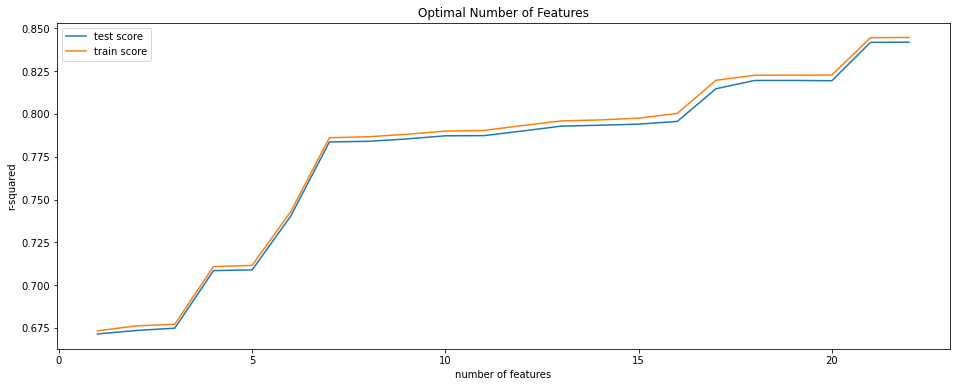

In [25]:
#lets try to see the train and test scores base on the number of attributes we use
#this time we are going to use the whole dataset and not only the train part
folds = KFold(n_splits = 10, shuffle = True, random_state = 100)
hyper_params = [{'n_features_to_select': list(range(1, 23))}]

lm = LinearRegression()
lm.fit(features_3, target_3)
rfe = RFE(lm)             

model_cv = GridSearchCV(estimator = rfe, 
                        param_grid = hyper_params, 
                        scoring= 'r2', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

model_cv.fit(features_3, target_3)  
cv_results = pd.DataFrame(model_cv.cv_results_)
plt.figure(figsize=(16,6))

plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_test_score"])
plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_train_score"])
plt.xlabel('number of features')
plt.ylabel('r-squared')
plt.title("Optimal Number of Features")
plt.legend(['test score', 'train score'], loc='upper left')

Fitting 10 folds for each of 22 candidates, totalling 220 fits


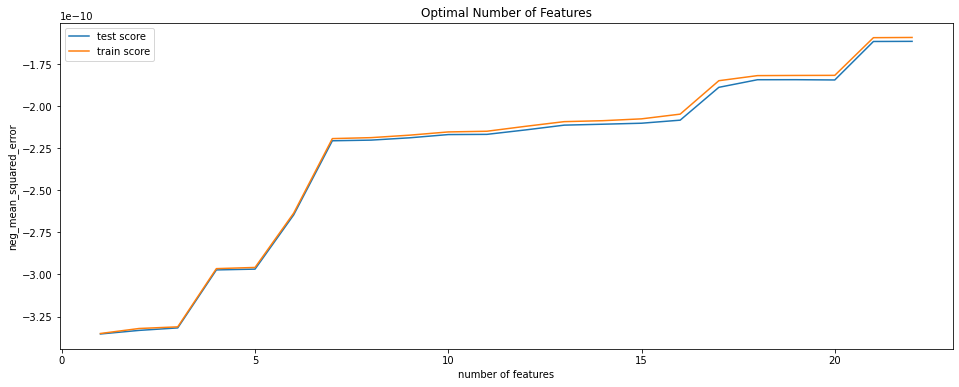

In [26]:
model_cv = GridSearchCV(estimator = rfe, 
                        param_grid = hyper_params, 
                        scoring= 'neg_mean_squared_error', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

model_cv.fit(features_3, target_3)  
cv_results = pd.DataFrame(model_cv.cv_results_)
plt.figure(figsize=(16,6))

plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_test_score"])
plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_train_score"])
plt.xlabel('number of features')
plt.ylabel('neg_mean_squared_error')
plt.title("Optimal Number of Features")
plt.legend(['test score', 'train score'], loc='upper left')

<h1> lets try to remove outliers on the train set before we scaled it</h1>

In [27]:
#we will use  the z-score to remove outliers
#because we will delete the outliers we have to merge target with the features
x_train_3_o =x_train_3.copy()
x_train_3_o['target']=target_3

x_test_3_o=x_test_3.copy()

from scipy import stats
z = np.abs(stats.zscore(x_train_3_o))
print(z)
x_train_3_o

[[0.59637924 0.58291326 0.63021596 ... 0.28540127 0.36983626 1.06078803]
 [0.56632532 0.58654681 0.70946942 ... 0.71824059 1.29538288 1.11444019]
 [0.55677596 0.53268002 0.63398543 ... 0.48584287 0.60840575 1.10775027]
 ...
 [0.52297553 0.58322065 0.42215706 ... 0.54497956 0.67780453 0.15598226]
 [0.96132052 1.11569978 2.62052142 ... 0.15683513 0.67260813 0.14089172]
 [0.26585119 0.1803246  0.46108293 ... 0.31590183 0.73141248 1.71342787]]


,mean_Convective_available_potential_energy-2,mean_Convective_available_potential_energy-3,mean_Convective_inhibition-1,mean_Convective_inhibition-3,mean_Friction_velocity,mean_Friction_velocity-2,mean_Friction_velocity-3,mean_Total_column_supercooled_liquid_water-1,mean_Total_column_supercooled_liquid_water-3,mean_largeScaleRainRate,...,mean_precipitationType-1,mean_precipitationType-2,mean_precipitationType-3,mean_instanteneousLargeScaleSurfacePrecipitation -1,mean_instanteneousLargeScaleSurfacePrecipitation -2,mean_instanteneousLargeScaleSurfacePrecipitation -3,mean_Total_column_cloud_liquid_water-2,var_hundred_metre_U_wind_component,var_hundred_metre_U_wind_component-3,target
2273,4.339464,4.623632,-32609.59074,-32728.57517,0.236218,0.288068,0.231074,0.032610,0.029285,0.000014,...,1.913294,2.034563,1.794429,0.341469,0.374523,0.272357,0.015603,1.824672,1.519201,0.000074
328,5.109669,4.528393,-32715.30222,-32701.55837,0.321459,0.334322,0.308976,0.038910,0.038195,0.000016,...,2.459168,2.720339,2.411961,0.334733,0.407915,0.331264,0.123393,5.388790,7.000651,0.000144
1392,5.354395,5.940305,-32614.61862,-32575.76502,0.278445,0.285373,0.255663,0.055073,0.026599,0.000037,...,1.207832,1.231935,1.088601,0.391217,0.310365,0.220940,0.151216,1.112867,0.733895,0.000073
2405,55.249553,47.621749,-29149.41546,-29347.99588,0.193165,0.180664,0.197636,0.020847,0.018019,0.000016,...,0.512842,0.509210,0.590551,0.308981,0.335802,0.390436,0.060670,8.143885,4.625906,0.000117
367,5.209132,4.762058,-32525.20534,-32706.77355,0.312157,0.356190,0.366511,0.036184,0.037576,0.000014,...,2.891950,2.930505,2.547344,0.454088,0.436880,0.384241,0.066280,1.505049,8.589500,0.000139
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1130,3.521061,3.526596,-32736.65344,-32730.46635,0.329972,0.344046,0.305821,0.028875,0.025510,0.000010,...,2.583470,2.744625,2.519624,0.404096,0.397781,0.382265,0.026109,18.012930,3.819208,0.000125
1294,51.555222,63.378100,-29698.71676,-29786.16252,0.237462,0.201721,0.218744,0.020377,0.015682,0.000014,...,0.535296,0.531549,0.497216,0.342724,0.352785,0.364425,0.001015,0.595209,0.686560,0.000059
860,6.220614,4.615575,-32332.07335,-32680.28629,0.260272,0.294079,0.280853,0.039063,0.032733,0.000011,...,0.962353,0.804058,0.538199,0.467230,0.369693,0.271786,0.063142,0.902861,0.505453,0.000103
3507,44.259344,49.146302,-28273.62553,-29953.89671,0.202017,0.225554,0.239241,0.018389,0.014919,0.000009,...,0.490691,0.445029,0.454028,0.259750,0.259693,0.287677,0.063450,2.281234,0.522558,0.000104


In [28]:
#by prior testing it the z-score should be lower than 2.4

threshold=2.4
x_train_3_o=x_train_3_o[(z < threshold).all(axis=1)]

y_train_3_o=x_train_3_o['target']


x_train_3_o=x_train_3_o.drop(['mean_Total_column_cloud_liquid_water-2','target'],axis=1)
x_test_3_o=x_test_3_o.drop('mean_Total_column_cloud_liquid_water-2',axis=1)
st2=StandardScaler()
#now lets scale the values
x_train_sc2=st2.fit_transform(x_train_3_o)
x_test_sc2=st2.transform(x_test_3_o)




In [29]:
model = sm.OLS(y_train_3_o, sm.add_constant(x_train_sc2)).fit()
y_pred = model.predict(sm.add_constant(x_test_sc2))
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                 target   R-squared:                       0.806
Model:                            OLS   Adj. R-squared:                  0.803
Method:                 Least Squares   F-statistic:                     355.7
Date:                Sun, 19 Dec 2021   Prob (F-statistic):               0.00
Time:                        21:48:28   Log-Likelihood:                 18002.
No. Observations:                1823   AIC:                        -3.596e+04
Df Residuals:                    1801   BIC:                        -3.584e+04
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0001   2.93e-07    355.163      0.0

<h1>As we see deleting the outliers does not work as good as having them </h1>
<h1>That means that outliers are useful for our model</h1>

In [30]:
x_train_3_o

,mean_Convective_available_potential_energy-2,mean_Convective_available_potential_energy-3,mean_Convective_inhibition-1,mean_Convective_inhibition-3,mean_Friction_velocity,mean_Friction_velocity-2,mean_Friction_velocity-3,mean_Total_column_supercooled_liquid_water-1,mean_Total_column_supercooled_liquid_water-3,mean_largeScaleRainRate,...,mean_largeScaleRainRate-3,mean_precipitationType,mean_precipitationType-1,mean_precipitationType-2,mean_precipitationType-3,mean_instanteneousLargeScaleSurfacePrecipitation -1,mean_instanteneousLargeScaleSurfacePrecipitation -2,mean_instanteneousLargeScaleSurfacePrecipitation -3,var_hundred_metre_U_wind_component,var_hundred_metre_U_wind_component-3
2273,4.339464,4.623632,-32609.59074,-32728.57517,0.236218,0.288068,0.231074,0.032610,0.029285,0.000014,...,0.000008,1.778225,1.913294,2.034563,1.794429,0.341469,0.374523,0.272357,1.824672,1.519201
328,5.109669,4.528393,-32715.30222,-32701.55837,0.321459,0.334322,0.308976,0.038910,0.038195,0.000016,...,0.000025,2.325417,2.459168,2.720339,2.411961,0.334733,0.407915,0.331264,5.388790,7.000651
2405,55.249553,47.621749,-29149.41546,-29347.99588,0.193165,0.180664,0.197636,0.020847,0.018019,0.000016,...,0.000013,0.570859,0.512842,0.509210,0.590551,0.308981,0.335802,0.390436,8.143885,4.625906
367,5.209132,4.762058,-32525.20534,-32706.77355,0.312157,0.356190,0.366511,0.036184,0.037576,0.000014,...,0.000018,3.015531,2.891950,2.930505,2.547344,0.454088,0.436880,0.384241,1.505049,8.589500
3151,19.657379,18.048043,-30935.10299,-31842.62560,0.235994,0.204896,0.215208,0.022039,0.021660,0.000022,...,0.000019,0.484412,0.521421,0.539767,0.574881,0.345204,0.323285,0.332310,5.956465,3.084958
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1638,38.164844,41.857584,-30393.62035,-30712.16160,0.196077,0.203024,0.217218,0.022331,0.021912,0.000012,...,0.000009,0.512625,0.484730,0.413474,0.462492,0.327748,0.285477,0.299597,1.754646,4.563042
3092,43.036318,46.480506,-30073.83768,-30355.52038,0.240224,0.183059,0.183223,0.023333,0.022933,0.000011,...,0.000012,0.549967,0.540172,0.543138,0.495769,0.391051,0.348297,0.316598,1.502622,1.070961
1095,6.640401,6.837094,-32512.76592,-32594.77585,0.338999,0.292830,0.291971,0.036952,0.042352,0.000014,...,0.000015,2.884466,2.910610,3.213186,3.101368,0.406250,0.466241,0.448470,9.034623,1.270968
1294,51.555222,63.378100,-29698.71676,-29786.16252,0.237462,0.201721,0.218744,0.020377,0.015682,0.000014,...,0.000009,0.532041,0.535296,0.531549,0.497216,0.342724,0.352785,0.364425,0.595209,0.686560


In [31]:
#lets try to modify the target value in order to be more understandable
# we will change from mean pracipitation/day  to total precipitation/ day
#also we will change the values from m to mm

y_test_3=y_test_3.values*24000
y_train_3=y_train_3.values*24000



In [32]:
model = sm.OLS(y_train_3, sm.add_constant(x_train_sc)).fit()
y_pred = model.predict(sm.add_constant(x_test_sc))
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     621.3
Date:                Sun, 19 Dec 2021   Prob (F-statistic):               0.00
Time:                        21:48:28   Log-Likelihood:                -575.05
No. Observations:                2555   AIC:                             1196.
Df Residuals:                    2532   BIC:                             1331.
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.5940      0.006    430.714      0.0

In [33]:
print('Mean Absolute Error ( Base):', metrics.mean_squared_error(y_test_3, y_pred))  

Mean Absolute Error ( Base): 0.09313050942454514


In [34]:
lm=LinearRegression()
lm.fit(x_train_3,y_train_3)
prediction = lm.predict(x_test_3)
mse_3 = mean_squared_error(y_test_3, prediction)
r2_3 = r2_score(y_test_3, prediction)

print("MSE:", mse_3)
print("RMSE:", sqrt(mse_3))
print("R^2:", r2_3)
print()

MSE: 0.09313050942451653
RMSE: 0.30517291725268897
R^2: 0.8441218928044176



In [35]:
y_test_3

array([2.1504  , 3.572952, 2.0184  , ..., 1.4808  , 2.972304, 1.5192  ])

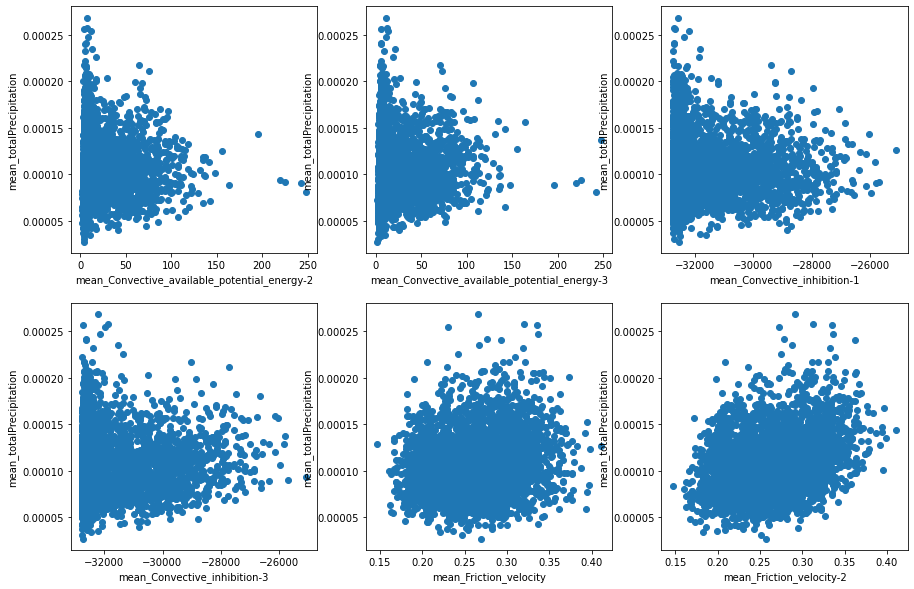

In [36]:
#For the choosen function lets do some data visualization
import matplotlib.pyplot as plt
columns=features_3.columns

columns=['mean_Convective_available_potential_energy-2',
       'mean_Convective_available_potential_energy-3',
       'mean_Convective_inhibition-1', 'mean_Convective_inhibition-3',
       'mean_Friction_velocity', 'mean_Friction_velocity-2']
          

#column=['mean_Total_column_supercooled_liquid_water','mean_largeScaleRainRate-1','mean_largeScaleRainRate','squared_Friction_velocity']
fig = plt.figure(figsize=(15,10))

for i in range(len(columns)):
    axs = fig.add_subplot(2,3,i+1)
    plt.scatter(features_3[columns[i]],target_3)
    axs.set_xlabel(columns[i])
    axs.set_ylabel('mean_totalPrecipitation')

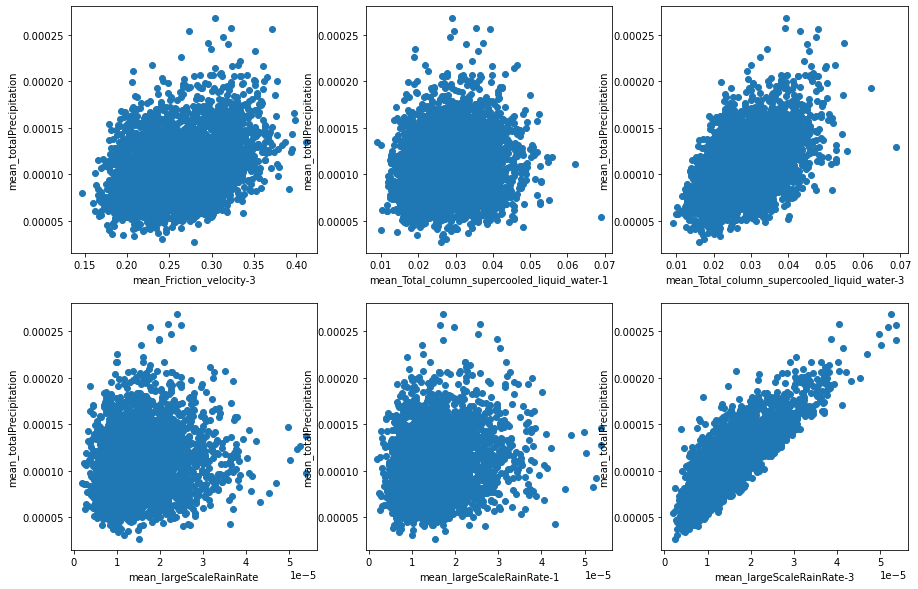

In [37]:
columns=['mean_Friction_velocity-3',
       'mean_Total_column_supercooled_liquid_water-1',
       'mean_Total_column_supercooled_liquid_water-3',
       'mean_largeScaleRainRate', 'mean_largeScaleRainRate-1',
       'mean_largeScaleRainRate-3']

fig = plt.figure(figsize=(15,10))

for i in range(len(columns)):
    axs = fig.add_subplot(2,3,i+1)
    plt.scatter(features_3[columns[i]],target_3)
    axs.set_xlabel(columns[i])
    axs.set_ylabel('mean_totalPrecipitation')


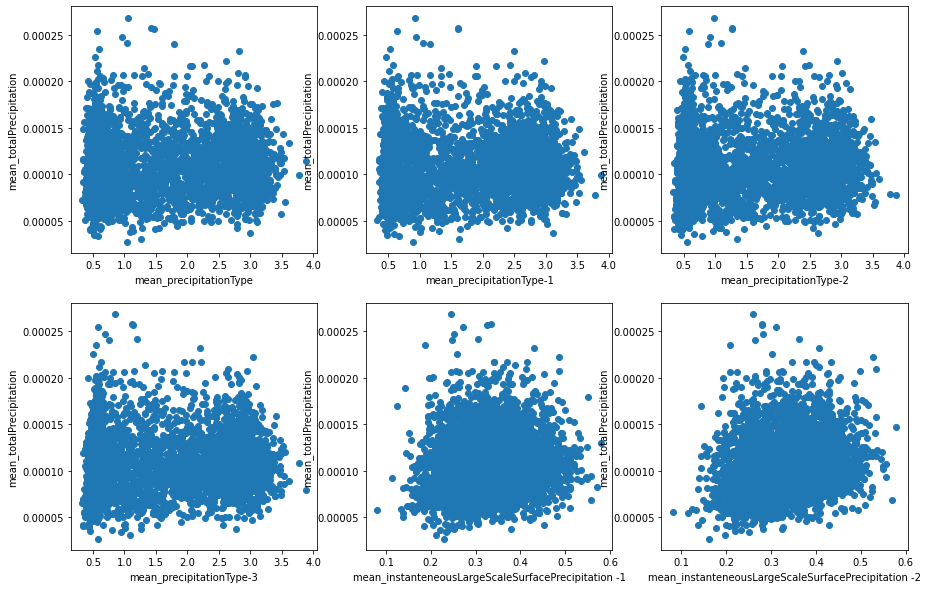

In [38]:

columns=['mean_precipitationType',
       'mean_precipitationType-1', 'mean_precipitationType-2',
       'mean_precipitationType-3',
       'mean_instanteneousLargeScaleSurfacePrecipitation -1',
       'mean_instanteneousLargeScaleSurfacePrecipitation -2']

fig = plt.figure(figsize=(15,10))

for i in range(len(columns)):
    axs = fig.add_subplot(2,3,i+1)
    plt.scatter(features_3[columns[i]],target_3)
    axs.set_xlabel(columns[i])
    axs.set_ylabel('mean_totalPrecipitation')


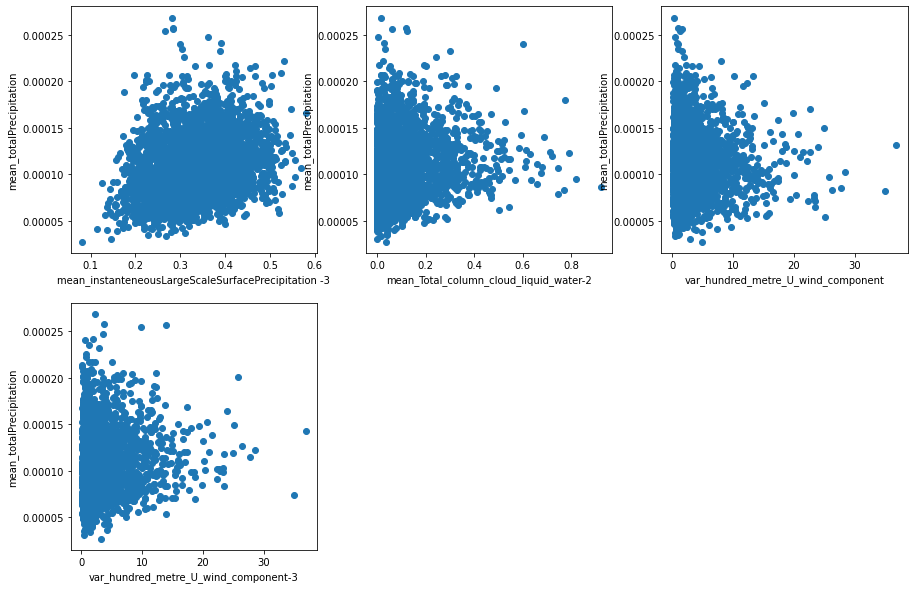

In [39]:

columns=['mean_instanteneousLargeScaleSurfacePrecipitation -3',
       'mean_Total_column_cloud_liquid_water-2',
       'var_hundred_metre_U_wind_component',
       'var_hundred_metre_U_wind_component-3']


fig = plt.figure(figsize=(15,10))

for i in range(len(columns)):
    axs = fig.add_subplot(2,3,i+1)
    plt.scatter(features_3[columns[i]],target_3)
    axs.set_xlabel(columns[i])
    axs.set_ylabel('mean_totalPrecipitation')

array([[<AxesSubplot:title={'center':'0'}>]], dtype=object)

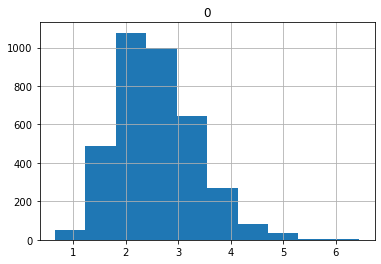

In [40]:
target_3=pd.DataFrame(target_3)
target_3=pd.DataFrame(target_3.values*24000)
target_3.hist()

<h3> References </h3>

In [41]:
#https://www.kaggle.com/jnikhilsai/cross-validation-with-linear-regression
#https://scikit-learn.org/stable/modules/cross_validation.html
#https://machinelearningmastery.com/feature-selection-for-regression-data/
#https://www.datasklr.com/ols-least-squares-regression/multicollinearity
#https://medium.datadriveninvestor.com/finding-outliers-in-dataset-using-python-efc3fce6ce32
#https://realpython.com/linear-regression-in-python/
#https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html
#Data mining tutorials
#https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html

In [42]:
y_test_3

array([2.1504  , 3.572952, 2.0184  , ..., 1.4808  , 2.972304, 1.5192  ])

(array([ 29., 283., 678., 709., 500., 231.,  79.,  35.,   7.,   4.]),
 array([0.6504   , 1.2012048, 1.7520096, 2.3028144, 2.8536192, 3.404424 ,
        3.9552288, 4.5060336, 5.0568384, 5.6076432, 6.158448 ]),
 <BarContainer object of 10 artists>)

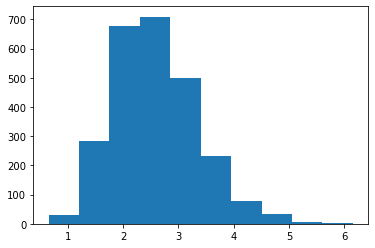

In [43]:
plt.hist(y_train_3)

In [44]:
y_train_3.max()


6.158448

In [45]:
y_test_3.max()

6.450816

In [46]:
y_train_3.mean()


2.5939718418786692

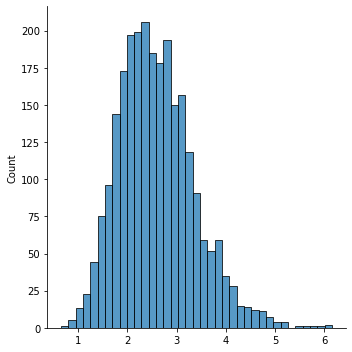

In [47]:
sns.displot(y_train_3)

In [48]:
y_train_3.mean()

2.5939718418786692